# 1. Introduction

Diabetes is a chronic disease that occurs when the pancreas is no longer able to produce insulin or when the body cannot make full use of the insulin it produces. In this case, our body’s blood sugar will rise, which will lead to a chronic damage dysfunction of various tissues, especially the eyes, kidneys, heart, blood vessels, and nerves.

In this project, we will utilize machine learning algorithms to predict early-stage diabetes risk.

## 1.1 Imports

To keep our project clean, we have consolidated all our imports in the cell below.

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree, preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# 2. Pre-processing and Data Cleaning

In [11]:
diabetes = pd.read_csv("diabetes_data_upload.csv")

# Split the data
np.random.seed(999)
train, test = train_test_split(diabetes, train_size=0.8, test_size=0.2)
train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
57,53,Female,No,No,No,No,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive
480,46,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
382,68,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
225,29,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Negative
481,53,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
348,28,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative


# 3. Exploratory Data Analysis

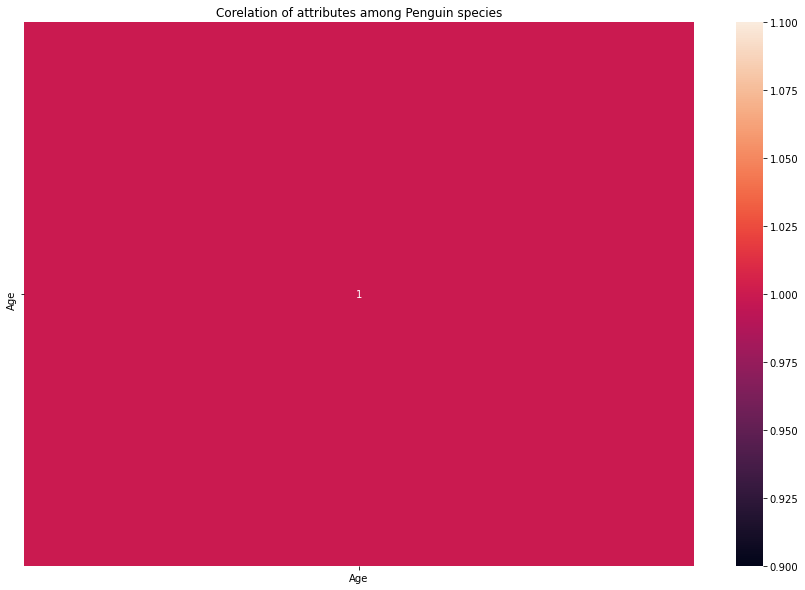

In [7]:
# sns.heatmap(train.corr(), annot = True, linewidths=1.2)
plt.subplots(figsize = (15,10))
sns.heatmap(train.corr(),annot=True).set_title("Corelation of attributes among Penguin species")
plt.show()

# 4. Model Selection

,Age
Age,1.0


# 5. Modeling

# 6. Result

# 7. Conclusion

# 8. Limitation